# Equations of motion (2nd order ODEs)

Equations of motion describe the behavior of physical systems by relating fundamental quantities such as position, velocity, acceleration, and forces. These equations form the foundation of classical mechanics, electromagnetism, quantum mechanics, and many other branches of physics. Newton’s Second Law, $\sum\vec{F}= m\vec{a}$, provides a fundamental starting point, leading to differential equations that govern motion under various forces. Whether modeling planetary orbits, oscillating systems, or fluid flow, equations of motion allow physicists to predict and analyze system dynamics. In computational physics, solving these equations numerically enables simulations of complex systems that lack analytical solutions, making them essential for fields ranging from astrophysics to engineering.

We know that the motion of an object is determined by Newton’s
equations. In the one-dimensional case, we can define the instantaneous
position $y(t)$, velocity $v(t)$ and acceleration $a(t)$ of an object
using the language of differential calculus: 
$$v(t)=\frac{dy}{dt}$$
$$a(t)=\frac{dv}{dt}$$ 
where the motion of the particle is defined by:
$$\frac{d^2y}{dt^2}=\frac{F(t)}{m} = f(t,y)$$.

Numerical methods, such as the Euler or Runge-Kutta methods, are often more effective when solving systems of first-order differential equations. To convert a second-order differential equation into a system of first-order equations, we introduce an auxiliary variable representing the first derivative. For example, given the equation, $$\frac{d^2y}{dt^2} = f(t,y,v)$$ we can define a new variable, $v=\frac{dy}{dt}$, which transforms the original equations into the system,
$$\frac{dy}{dt} = v$$
$$\frac{dv}{dt} = f(t,y,v)$$
This method allows numerical solvers to treat the system as a set of coupled first-order equations, making it compatible with standard integration techniques like Runge-Kutta.

For example, using Euler's method on traditional motion model, we obtain: 

$$
\begin{align}
v_{n+1}&=&v_n+f(t,y,v)\Delta t = v_n+a_n\Delta t, \\
y_{n+1}&=&y_n+v_n\Delta t,\end{align}$$ 

In this way, we can transform an $n$th-order differential equation into $n$ first-order differential equations. Given an general differential equation, 
$$\frac{d^{n}y}{dt^{n}} \equiv y^{(n)} = f\left( t, y, y', y'', \dots, y^{(n-1)} \right),$$
we can introduce a series of new variables to reduce the order of the equation,
$$y_1 = y, \quad y_2 = y', \quad y_3 = y'', \quad \dots, \quad y_n = y^{(n-1)}$$
and write a system of first-order ODEs,
$$\begin{aligned}
    y_1' &= y_2, \\
    y_2' &= y_3, \\
    &\vdots \\
    y_{n-1}' &= y_n, \\
    y_n' &= F(t, y_1, y_2, \dots, y_n),
\end{aligned}$$
You can then feed arrays into our ODE solving methods to calculate a solution.

## One dimensional motion
Let's use what we've learned to write a program to solve the 1D equations of motion for a falling object. We'll take the initial conditions: 
- $y_0=y(t=0)$
- $v_0=v(t=0)$.
  
We should compare results with
different $\Delta t$ and the exact solution.


This is a good time as any to introduce the concept of **objects** and object oriented programming in Python. We will first define a class "**particle**" to assist in analyzing motion.

# Classes in Python
A class in Python is a blueprint for creating objects. It defines a set of attributes (data) and methods (functions) that describe the behavior of the object. The following defines a class called `particle`.

In [19]:
class particle(object):
    # default values are assigned
    def __init__(self, mass=1., y=0., v=0.): # default values are assigned
        self.mass = mass
        self.y = y
        self.v = v
    # updates the position and velocity by Euler's method   
    def euler(self, f, dt): 
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        # Method to print particle properties
    def __str__(self):
        return f"Particle Properties:\nMass: {self.mass}\nPosition: {self.y}\nVelocity: {self.v}"

In [7]:
mylist = list([1,3,6])
print(mylist)
mylist.append(6)

[1, 3, 6]


## Key Class Concepts
1. The `__init__` Method (Constructor)
- This is called automatically when a new instance of the class is created.
- It initializes object attributes (also called instance variables).
- Default values (mass=1., y=0., v=0.) allow flexibility when creating objects.
2. Instance Variables (`self.mass`, `self.y`, `self.v`)
- `self` represents the instance of the class.
- Attributes are assigned using `self.attribute_name`.
3. Class Methods (`euler`)
- Functions inside a class are called methods.
- They define the behavior of objects.
- In `euler(self, f, dt)`, the position and velocity are updated using Euler's method, a numerical technique.

We can create an instance of this class:

In [23]:
# use default values
p1 = particle()
p2 = particle(mass = 2.,y=5.,v=3.)

In [25]:
print(p2)

Particle Properties:
Mass: 2.0
Position: 5.0
Velocity: 3.0


We are now in a position for a free falling particle. Let's start with imports and initializations

In [27]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
# some plot "beautification"
matplotlib.rcParams.update({'figure.dpi': 75, 'font.size': 10})

g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
weight = g*mass    # weight
dt = 0.5           # time step

part1 = particle(mass, y0, v0)

# since we do not know the size of the arrays, we define first a python list
# the append method is more efficient for lists than arrays
y = [y0] 
v = [v0] 
t = [0.]

Now we need a loop that solves the dynamics a long as the particle is above the ground.

In [31]:
# use y-value of the particle to check if the particle has hit the ground
while part1.y > 0.: 
    fy = -weight
    part1.euler(fy, dt) # update the position and velocity of the particle by Euler
    y.append(part1.y)
    v.append(part1.v)
    t.append(t[-1]+dt)

# we convert the list into a numpy array for plotting
t_data = np.array(t) 
y_data = np.array(y)
v_data = np.array(v)

In [35]:
y_data

array([300.  , 300.  , 297.55, 292.65, 285.3 , 275.5 , 263.25, 248.55,
       231.4 , 211.8 , 189.75, 165.25, 138.3 , 108.9 ,  77.05,  42.75,
         6.  , -33.2 ])

Let's plot the velocities and positions

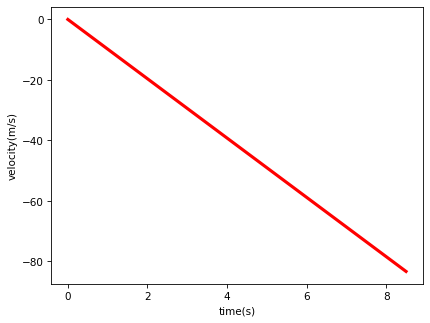

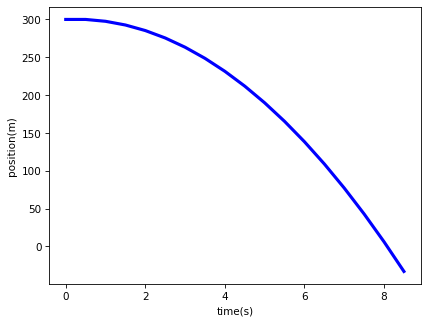

last time is 8.5


In [33]:
plt.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')
plt.show()

plt.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
plt.ylabel('position(m)')
plt.xlabel('time(s)')
plt.show()

print("last time is {}".format(t_data[-1]))

At the end of the process, we have a particle object that has new properties.

## Adding Air Resistance

Resistance from fluids (i.e. air) come in two forms of the velocity-dependent forces. Linear drag $$\vec{F}_{d} = -b_1\vec{v}$$ dominates for smaller objects though dense, viscous fluids. Quadratic drag $$\vec{F_{d}} = -b_2\vec{v}|\vec{v}|$$ dominates for larger, more massive objects through less dense mediums. The parameters $b_i$'s are parameters that depends on the properties of the medium and the shape of the object. Since $F$ increases as $v$ increases, there is a limiting velocity at which $F_d=F_g=mg$ and the acceleration vanishes. This limiting speed is, of course, the terminal velocity, $v_t$.


The model with air resistance looks pretty much identical to the previous one, but we need to introduce the drag force

last time is 3.4905800000144


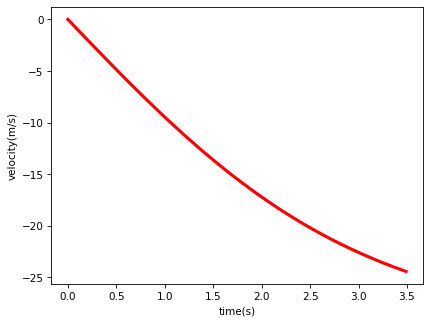

In [37]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 50.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
b2 = g*mass/vt**2  # drag coeff.

dt = 0.00001           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    fy = -gforce-b2*p.v*abs(p.v)
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print (i,t_data[i], y_data[i], v_data[i])

plt.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)');


print("last time is {}".format(t_data[-1]))

In [ ]:
plt.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
plt.ylabel('position(m)');
plt.xlabel('time (s)')

Now we want to ignore drag, which can effectively be done by sending $v_t \to \infty$

last time is 3.1999999999999758


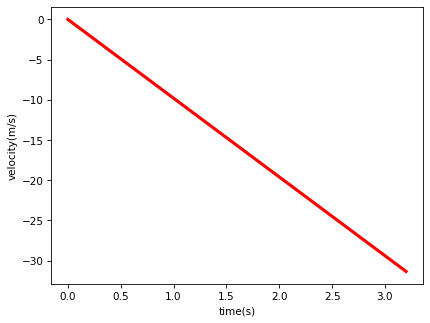

In [39]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 50.          # initial position
v0 = 0.            # initial velocity
vt = 1e10          # terminal velocity, making it HUGE!
b2 = g*mass/vt**2  # drag coeff.

dt = 0.01           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    fy = -gforce-b2*p.v*abs(p.v)
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print (i,t_data[i], y_data[i], v_data[i])

plt.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)');

print("last time is {}".format(t_data[-1]))

Of course, this physics is rather simple, but seeing the result come out so well in the numerical experiment helps give us confidence in them.

We solved the diff eq directly via numerical techniques. However, for some problems with harder diff eqs it's not so easy, and different approaches are worth considering.

### Question: how could you do this problem with a neural network?

# Two dimensional trajectories

In a 2d trajectory, the direction of the drag force is opposite to the
speed vector ${\bf v}$. Newton’s equations of motion for $x$ and $y$
components are written 
$$\begin{aligned}
&& m\frac{dv_x}{dt}=-F_{d,x}; \\
&& m\frac{dv_y}{dt}=-mg-F_{d,y};\end{aligned}$$ 
Using $F_d=b_2v^2$,
$v_x=v\cos{\theta}$ and $v_y=v\sin{\theta}$, we find
$$\begin{aligned}
&& \left[\frac{dx}{dt},\frac{dv_x}{dt}\right] = \left[v_x, -\frac{b_2}{m}vv_x\right] \\ 
&&\left[\frac{dy}{dt},\frac{dv_y}{dt}\right] = \left[v_y,-g-\frac{b_2}{m}vv_y\right] 
\end{aligned}$$
where $v^2=v_x^2+v_y^2$. Hence, we cannot calculate the vertical motion of the object without reference to the horizontal component.

![forces2](figures/forces2.png)
#### Object in a two dimensional trajectory under the effect of gravitational and dragging forces}


In [41]:
import numpy as np

class Particle2D:
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        """
        Initializes the particle with mass, position, and velocity.

        Parameters:
        - mass: Mass of the particle
        - x, y: Initial position (scalars)
        - vx, vy: Initial velocity (scalars)
        """
        self.mass = mass
        self.position = np.array([x, y], dtype=float)  # Vectorized position
        self.velocity = np.array([vx, vy], dtype=float)  # Vectorized velocity

    def euler(self, force, dt):
        """
        Updates the particle's state using the Euler method.

        Parameters:
        - force: A NumPy array representing force components [fx, fy]
        - dt: Time step (scalar)
        """
        self.velocity += (force / self.mass) * dt  # Vectorized velocity update
        self.position += self.velocity * dt  # Vectorized position update

    @property
    def x(self):
        return self.position[0]

    @property
    def y(self):
        return self.position[1]

    @property
    def vx(self):
        return self.velocity[0]

    @property
    def vy(self):
        return self.velocity[1]

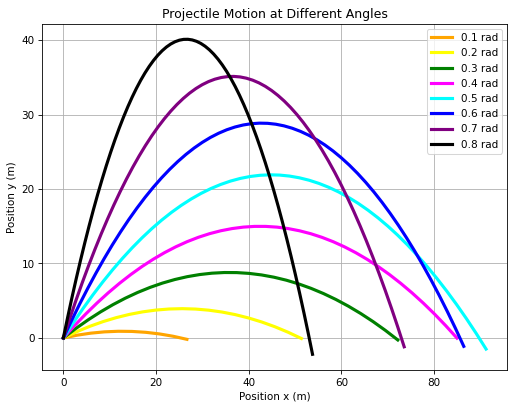

In [43]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ColorConverter as cc
import math

# Define constants
g = 9.8            # Acceleration due to gravity (m/s^2)
v0 = 30.           # Initial velocity (m/s)
dt = 0.1           # Time step (s)

# Define colors for plotting
colors = ['red', 'orange', 'yellow', 'green', 'magenta', 'cyan', 'blue', 'purple', 'black']


# Create plot
plt.figure(figsize=(8, 6))

# Simulate projectiles at different angles
for angle in range(1, 9):
    # Initial conditions
    theta = angle * 0.1 * math.pi / 2.
    velocity = np.array([math.cos(theta) * v0, math.sin(theta) * v0])
    p = Particle2D(1., 0., 0., *velocity)

    # Store trajectory data
    x_vals, y_vals = [p.x], [p.y]
    t_vals = [0.]
    
    # Simulate projectile motion
    while p.y >= 0.:
        force = np.array([0., -g])  # Gravity force vector
        p.euler(force, dt)
        x_vals.append(p.x)
        y_vals.append(p.y)
        t_vals.append(t_vals[-1] + dt)
    
    # Convert lists to numpy arrays for plotting
    x_data = np.array(x_vals)
    y_data = np.array(y_vals)
    
    # Plot trajectory
    plt.plot(x_data, y_data, color=colors[angle], ls='-', lw=3, label=f"{angle * 0.1:.1f}")

# Final plot adjustments
plt.xlabel('Position x (m)')
plt.ylabel('Position y (m)')
plt.title('Projectile Motion at Different Angles')
plt.legend()
plt.grid()
plt.show()

# An Introduction to Animations with `matplotlib`
`matplotlib.animation` is a module in Matplotlib used to create animated visualizations in Python. It provides classes such as `FuncAnimation` and `ArtistAnimation`, which allow for frame-by-frame updates to a figure, making it useful for demonstrating dynamic systems like particle motion, physics simulations, or real-time data visualization.

In Jupyter Notebooks, animations can be embedded using HTML rendering, making it easier to share or visualize results without exporting to external video formats.

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Define constants
g = 9.8       # Acceleration due to gravity (m/s²)
dt = 0.01     # Time step (s)

# Initialize particle
p = Particle2D(1., 0., 0., 10., 10.)
force = np.array([0., -g])  # Gravity force vector

# Set up figure and plot
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(0, 6), xlabel='distance x(m)', ylabel='distance y(m)')
points, = ax.plot([], [], marker='o', linestyle='None')

def init():
    """Initialize the animation frame."""
    points.set_data([], [])
    return points,

def animate(i):
    """Update function for animation."""
    if p.y >= 0 and i > 0:
        p.euler(force, dt)  # Update particle motion using vectorized force
    points.set_data([p.x], [p.y])  # Wrap x and y as lists/arrays
    return points,

# Create the animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=3)

# Embed the animation in the notebook
HTML(anim.to_jshtml())


In [ ]:
f = ax.plot([], [], marker='o', linestyle='None')

In [ ]:
print(f)

# Using `solve_ivp`?

In [ ]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Constants
g = 9.8  # Gravity (m/s^2)
dt = 0.01  # Time step (s)
t_max = 2  # Max time for simulation (adjust based on expected flight time)

# Initial conditions
x0, y0 = 0.0, 0.0  # Initial position
vx0, vy0 = 10.0, 10.0  # Initial velocity

# Define the system of ODEs for 2D projectile motion
def projectile_motion(t, state):
    """
    Computes the derivative of state for projectile motion.
    
    state = [x, y, vx, vy]
    dx/dt = vx
    dy/dt = vy
    dvx/dt = 0  (no horizontal acceleration)
    dvy/dt = -g (gravity)
    """
    x, y, vx, vy = state
    return [vx, vy, 0, -g]  # dx/dt, dy/dt, dvx/dt, dvy/dt

# Solve the system using solve_ivp
sol = solve_ivp(projectile_motion, (0, t_max), [x0, y0, vx0, vy0], 
                method='RK45', t_eval=np.arange(0, t_max, dt))

# Extract solution
x_data, y_data = sol.y[0], sol.y[1]

# Trim data to remove points after projectile hits the ground (y < 0)
valid_indices = y_data >= 0
x_data = x_data[valid_indices]
y_data = y_data[valid_indices]

# Create figure and animation
fig, ax = plt.subplots()
ax.set_xlim(0, max(x_data) + 1)
ax.set_ylim(0, max(y_data) + 1)
ax.set_xlabel('Distance x (m)')
ax.set_ylabel('Distance y (m)')
points, = ax.plot([], [], marker='o', linestyle='None')

def init():
    """Initialize the animation frame."""
    points.set_data([], [])
    return points,

def animate(i):
    """Update function for animation."""
    if i < len(x_data):
        points.set_data([x_data[i]], [y_data[i]])  # Ensure data is in list form
    return points,

# Create animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x_data), interval=dt * 1000)

# Embed animation in Jupyter Notebook
HTML(anim.to_jshtml())


## Event Detection using `solve_ivp`
In the code above, you may have noticed that we filtered data for when the "ball" is below ground. It might be easier to use built-in functionality of `solve_ivp` to helps us.


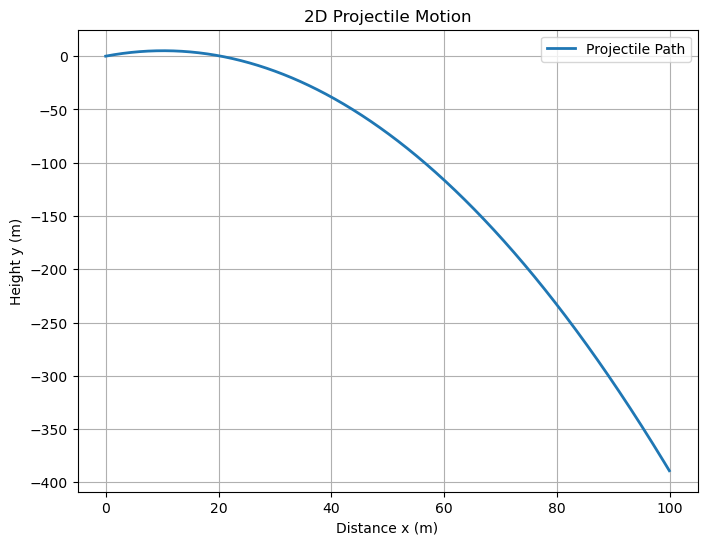

Flight time: 9.99 s
Range: 99.90 m
Final height: -389.12 m (should be 0)


In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g = 9.8  # Gravity (m/s²)
t_max = 10  # Maximum simulation time (s) (arbitrary large value)
dt = 0.01  # Time step for evaluation

# Initial conditions
x0, y0 = 0.0, 0.0  # Initial position
vx0, vy0 = 10.0, 10.0  # Initial velocity

# Define the system of ODEs for 2D projectile motion
def projectile_motion(t, state):
    """
    Computes the derivative of state for projectile motion.
    
    state = [x, y, vx, vy]
    dx/dt = vx
    dy/dt = vy
    dvx/dt = 0  (no horizontal acceleration)
    dvy/dt = -g (gravity)
    """
    x, y, vx, vy = state
    return [vx, vy, 0, -g]  # dx/dt, dy/dt, dvx/dt, dvy/dt

# Define an event function to stop integration when y = 0 (hits the ground)
def hit_ground(t, state):
    return state[1]  # y position

# Stop the integration when the projectile reaches the ground

# Solve the system using solve_ivp with event detection
sol = solve_ivp(projectile_motion, (0, t_max), [x0, y0, vx0, vy0], method='RK45', t_eval=np.arange(0, t_max, dt), events=hit_ground)

# Extract solution
t_data = sol.t  # Time points
x_data, y_data = sol.y[0], sol.y[1]  # Positions

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, label="Projectile Path", lw=2)
plt.xlabel('Distance x (m)')
plt.ylabel('Height y (m)')
plt.title('2D Projectile Motion')
plt.legend()
plt.grid()
plt.show()

# Display final values
print(f"Flight time: {sol.t[-1]:.2f} s")
print(f"Range: {x_data[-1]:.2f} m")
print(f"Final height: {y_data[-1]:.2f} m (should be 0)")


Stability
---------
A major consideration in integrating differential equations is the numerical stability of the algorithm used. Since we have replaced the differential equation by a difference equation, we know that our results will not be exact. Discrepancies will arise when using different step sizes, for instance. This is the “truncation error” and depends on the method employed. Other errors that do not originate in the method
correspond to the roundoffs performed by the computer, since it does not work with real numbers, but with a finite number of digits determined by the hardware. These roundoff errors will accumulate and can become significant in some cases.

In practice we determine the accuracy of our solutions by reducing the value of the step until the solutions unchanged at the desired level of accuracy.

In addition to accuracy, another important factor is the stability of the algorithm. For instance, it may occur that the numerical results are very good for short times, but diverge from the “true” solution for longer times. Such an algorithm is said to be “unstable” for the particular problem.

Let's illustrate this point with an equation that displays bad behavior for larger time points, in a way that you don't necessarily see at first. The below code goes through and solves $$\frac{dy}{dt} = -\lambda y(t)$$ 





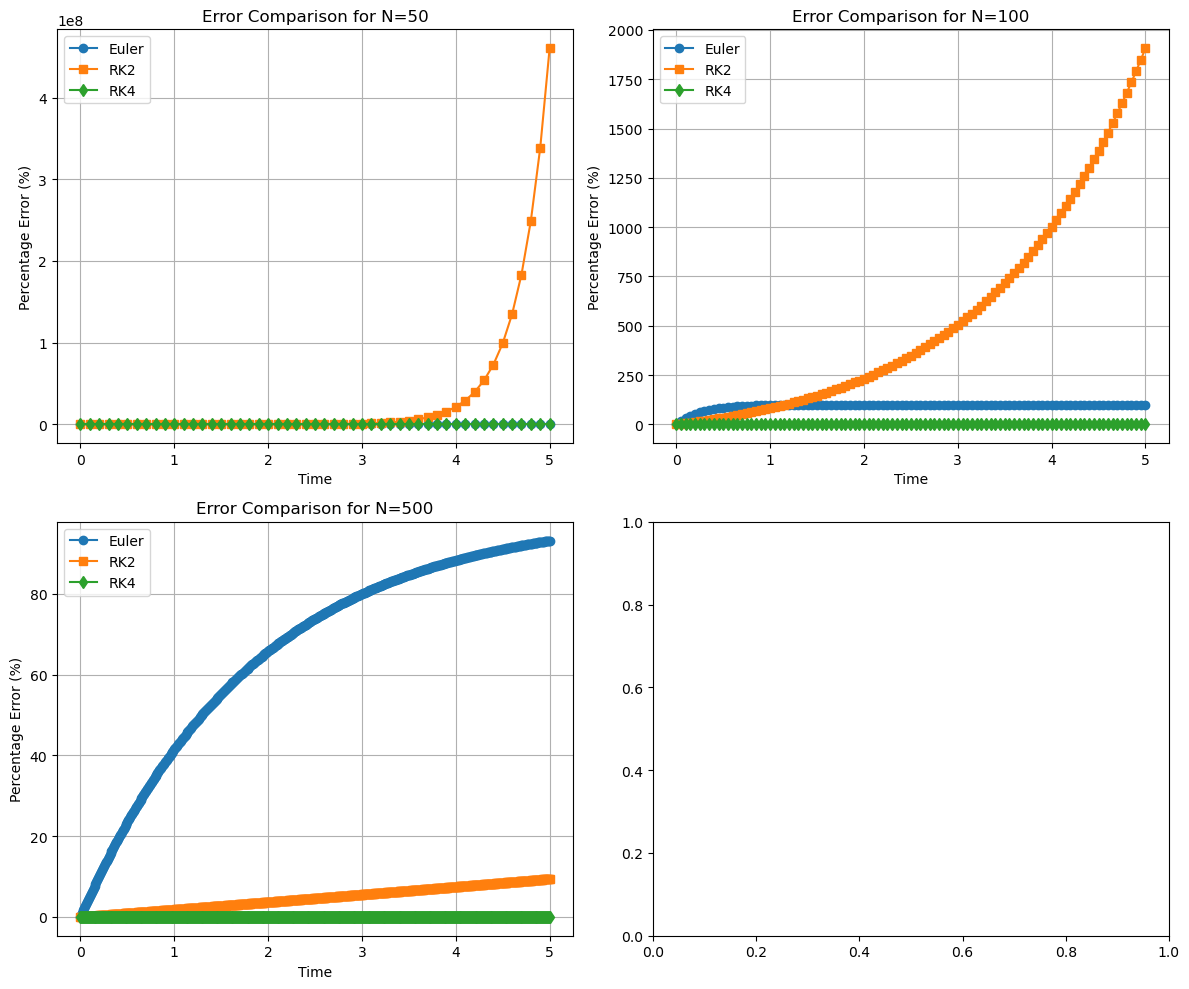

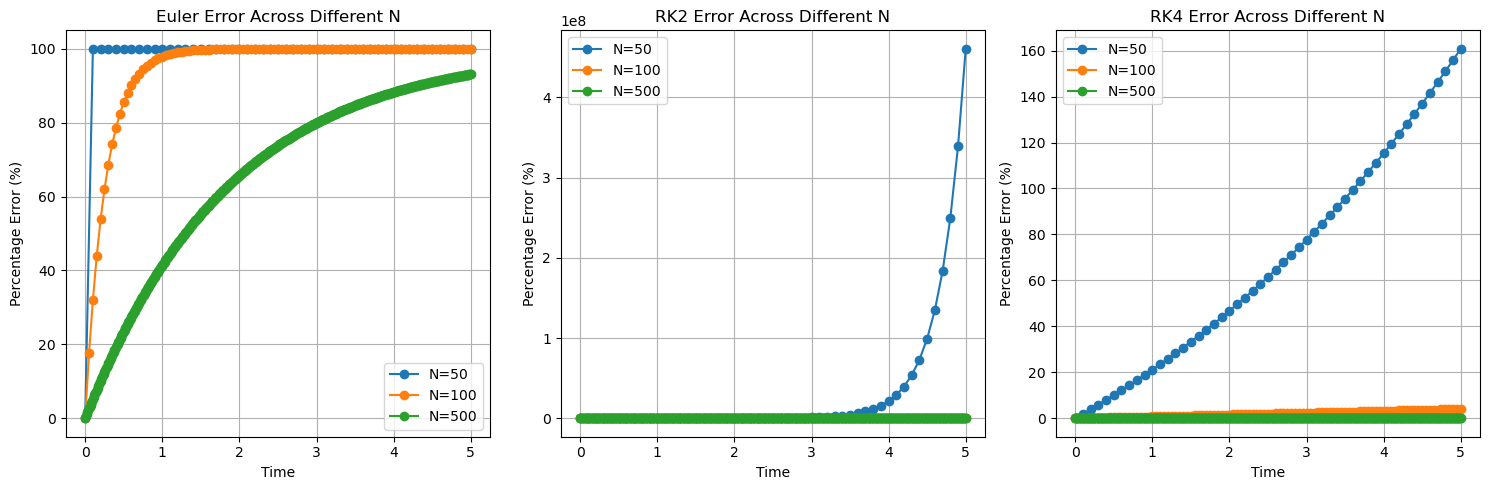

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Problem setup
lambda_ = 10   # Decay rate
y0 = 1.0       # Initial condition
T = 5   # Total time
N_values = [50, 100, 500]  # Different step sizes

def euler_method(N):
    dt = T / N
    y = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    y[0] = y0
    for i in range(N):
        y[i+1] = y[i] - dt * lambda_ * y[i]  #Euler step
    return t, y

def rk2_method(N):
    dt = T / N
    y = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    y[0] = y0
    for i in range(N):
        k1 = -lambda_ * y[i]
        k2 = -lambda_ * (y[i] + dt * k1 / 2)
        y[i+1] = y[i] + dt * k2  # RK2 step
    return t, y

def rk4_method(N):
    dt = T / N
    y = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)
    y[0] = y0
    for i in range(N):
        k1 = -lambda_ * y[i]
        k2 = -lambda_ * (y[i] + dt * k1 / 2)
        k3 = -lambda_ * (y[i] + dt * k2 / 2)
        k4 = -lambda_ * (y[i] + dt * k3)
        y[i+1] = y[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)  # RK4 step
    return t, y

# True solution function
def exact_solution(t):
    return y0 * np.exp(-lambda_ * t)

# ---- First Set of Plots: Compare errors for each N ----
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, N in enumerate(N_values):
    t_exp, y_euler = euler_method(N)
    t_rk2, y_rk2 = rk2_method(N)
    t_rk4, y_rk4 = rk4_method(N)

    # Compute percentage errors
    y_exact_exp = exact_solution(t_exp)
    y_exact_rk2 = exact_solution(t_rk2)
    y_exact_rk4 = exact_solution(t_rk4)

    error_euler = np.abs((y_euler - y_exact_exp) / y_exact_exp) * 100
    error_rk2 = np.abs((y_rk2 - y_exact_rk2) / y_exact_rk2) * 100
    error_rk4 = np.abs((y_rk4 - y_exact_rk4) / y_exact_rk4) * 100

    ax = axes[idx // 2, idx % 2]
    ax.plot(t_exp, error_euler, 'o-', label='Euler')
    ax.plot(t_rk2, error_rk2, 's-', label='RK2')
    ax.plot(t_rk4, error_rk4, 'd-', label='RK4')

    ax.set_title(f'Error Comparison for N={N}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Percentage Error (%)')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

# ---- Second Set of Plots: Compare each method across different N ----
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

methods = {
    'Euler': euler_method,
    'RK2': rk2_method,
    'RK4': rk4_method
}
# Run through methods
for idx, (method_name, method_func) in enumerate(methods.items()):
    ax = axes[idx]
    for N in N_values:
        t, y = method_func(N)
        y_exact = exact_solution(t)
        error = np.abs((y - y_exact) / y_exact) * 100

        ax.plot(t, error, 'o-', label=f'N={N}')
    
    ax.set_title(f'{method_name} Error Across Different N')
    ax.set_xlabel('Time')
    ax.set_ylabel('Percentage Error (%)')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()
